<a href="https://colab.research.google.com/github/zaegeon/Python/blob/main/ML/20220613_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier # KNN 분류기(모델)
from sklearn.model_selection import train_test_split # 훈련/테스트 셋 분리 함수
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # 평가지표
from sklearn.preprocessing import StandardScaler, MinMaxScaler # 변환기(특성 스케일링) 

# iris 데이터 셋

In [ ]:
# sklearn 패키지에서 datasets 모듈을 import
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()

In [ ]:
type(iris) # Bunch

sklearn.utils.Bunch

`bunch` : Python의 `dict` 클래스와 비슷. 

*  `key : value` 형식으로 아이템들을 저장하는 데이터 타입.
*  `bunch['key']` 또는 `bunch.key` 형식으로 value들을 사용할 수 있음.

In [ ]:
iris.keys() # Bunch 객체의 key들의 집합을 리턴.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris_data = iris.data
feature_names = iris.feature_names
target = iris.target
target_names = iris.target_names

In [ ]:
X = iris_data
y = target

In [ ]:
# Bunch 객체의 속성들 중에서 특성 배열(X), 타겟 배열(y)만 리턴.
X, y = datasets.load_iris(return_X_y=True)

In [ ]:
# Bunch 객체의 속성들 중에서 특성 배열(X)을 DataFrame으로, 타겟 배열(y)을 Series로 리턴.
X, y = datasets.load_iris(return_X_y=True, as_frame=True)

# 훈련 셋 / 테스트 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    shuffle=True,
                                                    stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
knn = KNeighborsClassifier() # 모델 생성
knn.fit(X_train, y_train) # 모델 훈련
print('Train acc :', knn.score(X_train, y_train)) # 훈련 셋에서의 정확도
print('Test acc :', knn.score(X_test, y_test)) # 테스트 셋에서의 정확도

Train acc : 0.9666666666666667
Test acc : 0.9666666666666667


In [ ]:
std_scaler = StandardScaler() # 표준화 특성 스케일 변환기 생성
std_scaler.fit(X_train) # 훈련 셋의 평균과 표준편차를 찾음
X_train_std = std_scaler.transform(X_train) # 훈련 셋을 표준화

# (훈련 셋에서 찾은 평균과 표준편차를 사용해서) 테스트 셋을 스케일링
X_test_std = std_scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier() # 모델 생성
knn.fit(X_train_std, y_train) # 모델 훈련
train_pred = knn.predict(X_train_std) # 스케일링된 훈련 셋의 예측값
train_pred

array([0, 0, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2,
       2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 2, 1, 0,
       1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 1, 0,
       0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 2, 1, 1, 1, 2, 0, 2, 1,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
test_pred = knn.predict(X_test_std) # 스케일링된 훈련 셋의 예측값

In [ ]:
knn.score(X_train_std, y_train)

0.9666666666666667

In [ ]:
knn.score(X_test_std, y_test)

0.9666666666666667

In [ ]:
iris_cm = confusion_matrix(y_test, test_pred)
iris_cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]])

In [ ]:
# 정확도 계산
print('Accuracy :', round((iris_cm[0][0] + iris_cm[1][1] + iris_cm[2][2]) / 30, 4) )

Accuracy : 0.9667


# 이진 분류 : Setosa, Setosa가 아닌 것 분류

In [ ]:
is_setosa = (target_names[target] == 'setosa')
X = iris_data
y = is_setosa

In [ ]:
np.unique(y, return_counts=True)

(array([False,  True]), array([100,  50]))

## 훈련 셋 / 테스트 셋 분리

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 1,
                                                    shuffle=True,
                                                    stratify=y)

## Feature Scaling

In [ ]:
std_scaler = StandardScaler() # 표준화 특성 스케일 변환기 생성
std_scaler.fit(X_train) # 훈련 셋의 평균과 표준편차를 찾음
X_train_std = std_scaler.transform(X_train) # 훈련 셋을 표준화

# (훈련 셋에서 찾은 평균과 표준편차를 사용해서) 테스트 셋을 스케일링
X_test_std = std_scaler.transform(X_test)

## KNN 모델 훈련

In [ ]:
knn = KNeighborsClassifier() # 모델 생성
knn.fit(X_train, y_train) # 모델 훈련
print('Train acc :', knn.score(X_train, y_train)) # 훈련 셋에서의 정확도
print('Test acc :', knn.score(X_test, y_test)) # 테스트 셋에서의 정확도

Train acc : 1.0
Test acc : 1.0


In [ ]:
knn = KNeighborsClassifier() # 모델 생성
knn.fit(X_train_std, y_train) # 모델 훈련
train_pred = knn.predict(X_train_std) # 스케일링된 훈련 셋의 예측값
train_pred

array([False,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
        True, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False, False, False, False,  True,
       False, False, False, False, False,  True,  True, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False,  True,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False,  True, False,  True,  True, False,  True, False,
       False, False, False])

In [ ]:
test_pred = knn.predict(X_test_std) # 스케일링된 훈련 셋의 예측값
test_pred

array([ True, False, False, False, False, False,  True,  True,  True,
       False, False, False,  True, False,  True, False,  True, False,
       False,  True, False, False, False, False,  True,  True, False,
       False, False, False])

In [ ]:
# 트레인 셋의 정확도
knn.score(X_train_std, y_train)

1.0

In [ ]:
# 테스트 셋의 정확도
knn.score(X_test_std, y_test)

1.0

In [ ]:
# 정밀도(species = 'Setosa')
precision_score(y_test, test_pred, pos_label=True)

1.0

In [ ]:
# 정밀도(species != 'Setosa')
precision_score(y_test, test_pred, pos_label=False)

1.0

## k값의 변화에 따른 테스트 셋의 정확도

In [ ]:
accuracies = []                               # 테스트 셋 정확도 저장할 리스트
k_values = np.arange(1, 121)                  # k 값 범위
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k) # 모델 생성
    knn.fit(X_train_std, y_train)             # 모델 훈련
    acc = knn.score(X_test_std, y_test)
    accuracies.append(acc)
print(accuracies)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.66

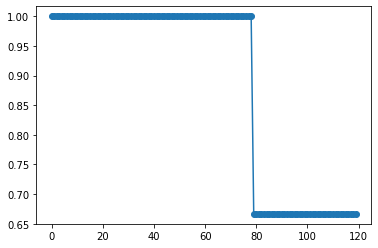

In [ ]:
plt.plot(accuracies, marker='o')
plt.show()

# 다중 클래스 분류(Multi Classification)

In [ ]:
X = iris.data.copy()
y = iris.target.copy()

## Train / test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y,
                                          test_size=0.2,
                                          random_state=42,
                                          stratify=y)

In [ ]:
np.unique(y_tr, return_counts=True)

(array([0, 1, 2]), array([40, 40, 40]))

In [ ]:
np.unique(y_te, return_counts=True)

(array([0, 1, 2]), array([10, 10, 10]))

## Feature Scaling

In [ ]:
scaler = StandardScaler() # Scaler 생성

In [ ]:
X_tr_scaled = scaler.fit_transform(X_tr) # 훈련 셋 스케일링

In [ ]:
X_te_scaled = scaler.transform(X_te) # 테스트 셋 스케일링

## KNN 모델 훈련, 평가

In [ ]:
knn = KNeighborsClassifier() # 모델 생성

In [ ]:
knn.fit(X_tr_scaled, y_tr) # 모델 훈련(학습)

KNeighborsClassifier()

In [ ]:
tr_pred = knn.predict(X_tr_scaled) # 훈련 셋 예측값 → shape : (120,)
tr_pred[:6]

array([0, 1, 1, 0, 1, 2])

In [ ]:
te_pred = knn.predict(X_te_scaled)

In [ ]:
tr_proba = knn.predict_proba(X_tr_scaled) # 훈련 셋 예측 확률 → shape : (120, 3)
tr_proba[:6]

array([[1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8]])

In [ ]:
accuracy_score(y_tr, tr_pred)

0.975

In [ ]:
confusion_matrix(y_tr, tr_pred) # 오차 행렬(혼동 행렬, 혼돈 행렬)

array([[40,  0,  0],
       [ 0, 39,  1],
       [ 0,  2, 38]])

실제 Versicolor 40개 중에서 1개는 Virginica로 잘못 예측.

실제 Virginica 40개 중에서 2개는 Versicolor로 잘못 예측.

In [ ]:
report = classification_report(y_tr, tr_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.95      0.97      0.96        40
           2       0.97      0.95      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [ ]:
accuracy_score(y_te, te_pred) # 테스트 셋 예측값

0.9333333333333333

In [ ]:
confusion_matrix(y_te, te_pred) # 테스트 셋 오차 행렬

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  8]])

In [ ]:
precision_score(y_te, te_pred, average=None)

array([1.        , 0.83333333, 1.        ])

* __과(대)적합(overfitting)__ : 
    * 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 높은 경우.
    * 과대적합이 너무 크면 학습되지 않은 데이터에서는 오차가 크게 발생.
    * 일반적으로 지도학습에서는 과대적합이 발생하는 경우가 많음.
    * 과적합의 크기(정도)가 작은 모델일수록 좋은 모델.
    * 과적합을 줄이기 위한 방법 → *규제(regulation)* 적용

* __과소적합(underfitting)__ :
    * 훈련 셋에서의 평가 점수가 테스트 셋에서의 평가 점수보다 낮은 경우.
    * 보통 훈련 샘플의 개수가 적은 경우에 과소적합이 발생하는 경우가 많음.
    * 훈련 샘플을 더 많이 수집해서 모델을 훈련시키면 과소적합을 해결할 수 있음.
    * *교차검증(cross validation)*을 사용해서 훈련 샘플의 크기를 늘려주는 효과를 줄 수 있음.

## k값 변화에 따른 훈련 셋과 테스트 셋의 정확도 그래프

In [ ]:
k_values = np.arange(1, 41)
tr_scores = [] # 훈련 셋에서 계산한 정확도를 저장할 리스트
te_scores = [] # 테스트 셋에서 계산한 정확도를 저장할 리스트
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)   # KNN 모델 생성
    knn.fit(X_tr_scaled, y_tr)                  # 모델 훈련
    tr_acc = knn.score(X_tr_scaled, y_tr)       # 훈련 셋 예측값
    tr_scores.append(tr_acc)
    te_acc = knn.score(X_te_scaled, y_te)       # 테스트 셋 예측값
    te_scores.append(te_acc)
print(tr_scores)
print(te_scores)

[1.0, 0.9666666666666667, 0.9583333333333334, 0.9583333333333334, 0.975, 0.9583333333333334, 0.975, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.9416666666666667, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9583333333333334, 0.95, 0.9583333333333334, 0.9333333333333333, 0.9333333333333333, 0.925, 0.9166666666666666, 0.9166666666666666, 0.9, 0.8916666666666667, 0.8916666666666667, 0.8833333333333333, 0.875, 0.8833333333333333, 0.8833333333333333, 0.8916666666666667, 0.8916666666666667, 0.8916666666666667]
[0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.966666

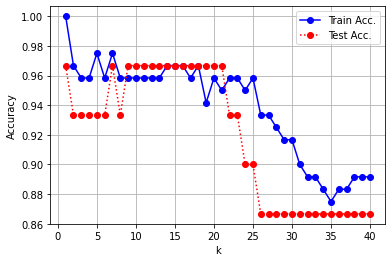

In [ ]:
plt.plot(k_values, tr_scores, 'bo-', label='Train Acc.') # 훈련 셋 정확도 시각화
plt.plot(k_values, te_scores, 'ro:', label='Test Acc.')  # 테스트 셋 정확도 시각화

plt.legend()
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid()
plt.show()